In [29]:
# 5 КАРМАНОВ

In [30]:
import pandas as pd
import numpy as np
import prophet
from make_series import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import warnings
from statsmodels.tsa.arima.model import ARIMA


warnings.filterwarnings("ignore")

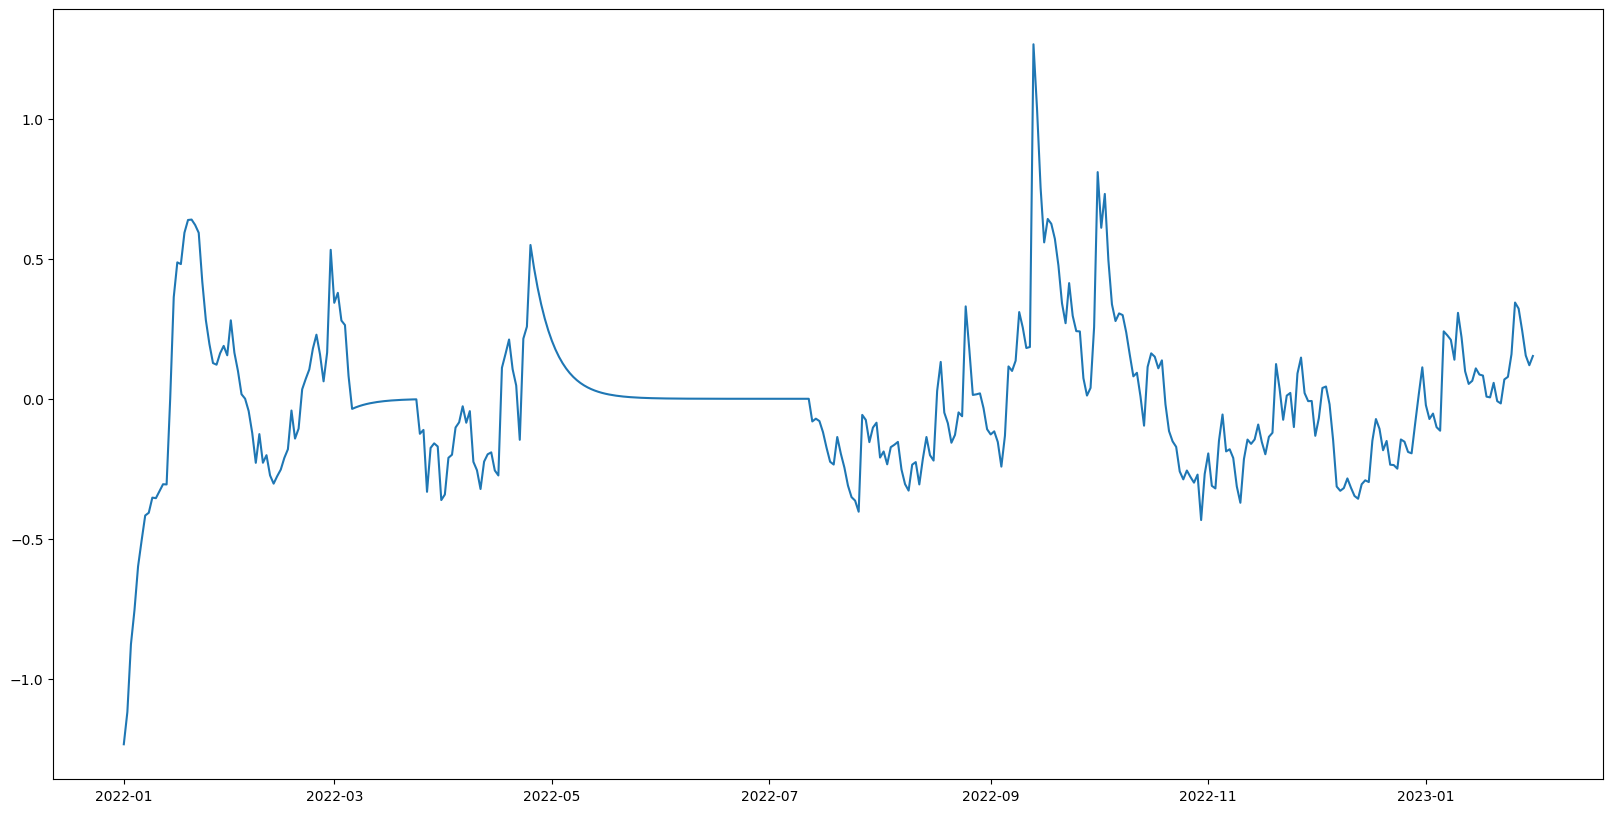

In [31]:
# Соберем нужные данные
df = pd.read_excel('../data/normalized_data.xlsx')
series = make_series(df,['Готовая женская одежда',"Одежда для всей семьи","Детская одежда, включая одежду для самых маленьких",'Спортивная одежда, одежда для верховой езды и езды на мотоцикле','Магазины мужской и женской одежды'], is_exponential_smoothing=True)
series_diff = [0.4]
for i in range(1, len(series)):
    series_diff.append(series[i] / series[i-1])

dates = get_all_dates()

# Сделаем из 2 столбцов датафрейм
df = pd.DataFrame({'ds': dates, 'y': series})


df['ds'] = pd.to_datetime(df['ds'])

# Сделаем график series
plt.figure(figsize=(20, 10))
plt.plot(df['ds'], df['y'])
plt.show()

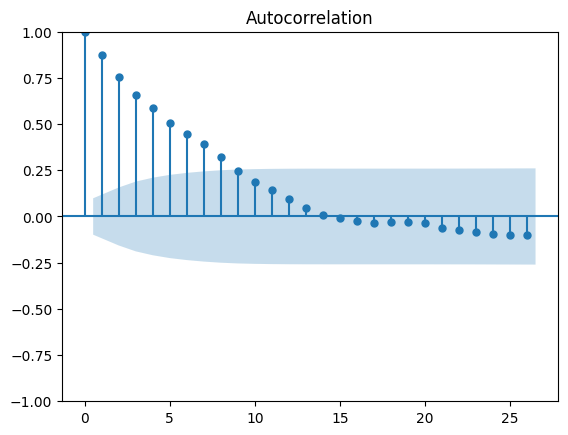

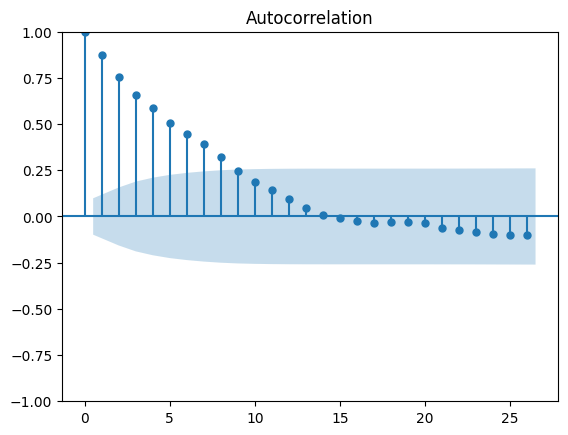

In [32]:
# Построим график автолкорреляции на всех данных
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(series))


In [33]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.778498
p-value                          0.000060
#Lags Used                       7.000000
Number of Observations Used    388.000000
Critical Value (1%)             -3.447317
Critical Value (5%)             -2.869018
Critical Value (10%)            -2.570754
dtype: float64


In [34]:
# Создадим модель prophet
model = prophet.Prophet()
# Добавим сезонность
model.add_seasonality(name='monthly', period=300.                        , fourier_order=50)
model.fit(df)



14:18:16 - cmdstanpy - INFO - Chain [1] start processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing


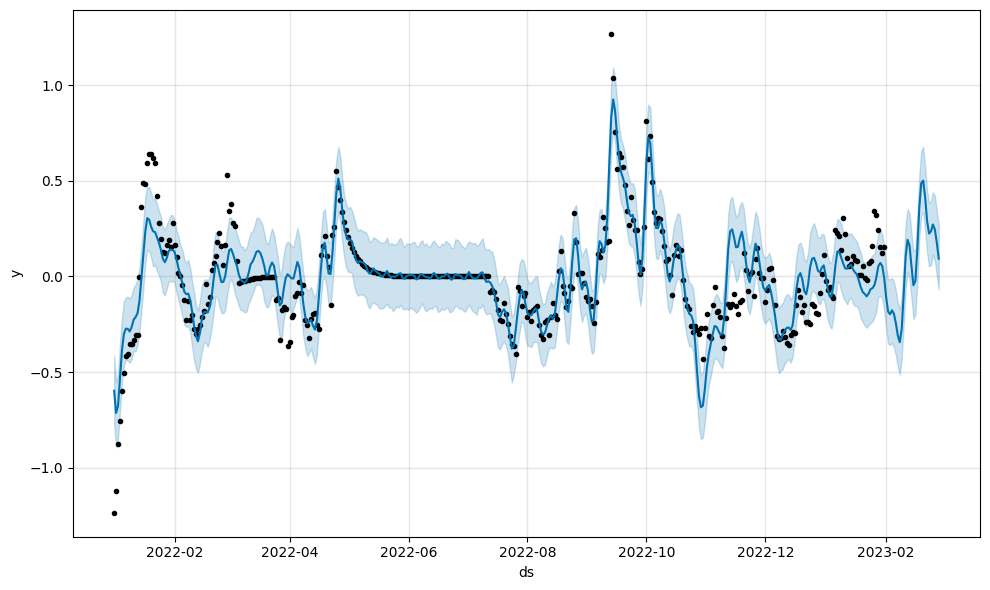

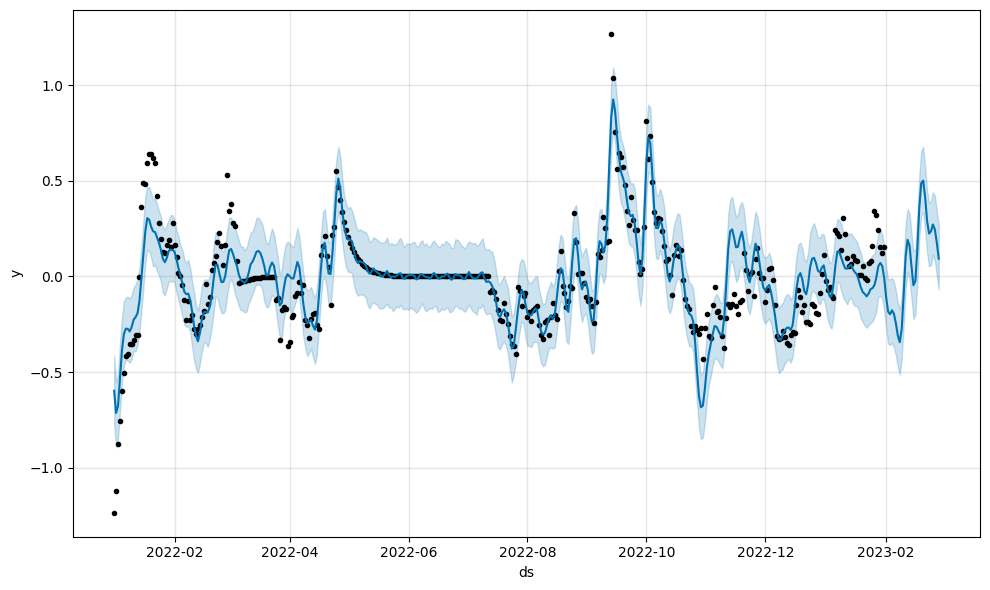

In [38]:
# Построим график реальных значений и предсказанных на тренировочной выборке
future = model.make_future_dataframe(periods=28, freq='D')
forecast = model.predict(future)
model.plot(forecast)


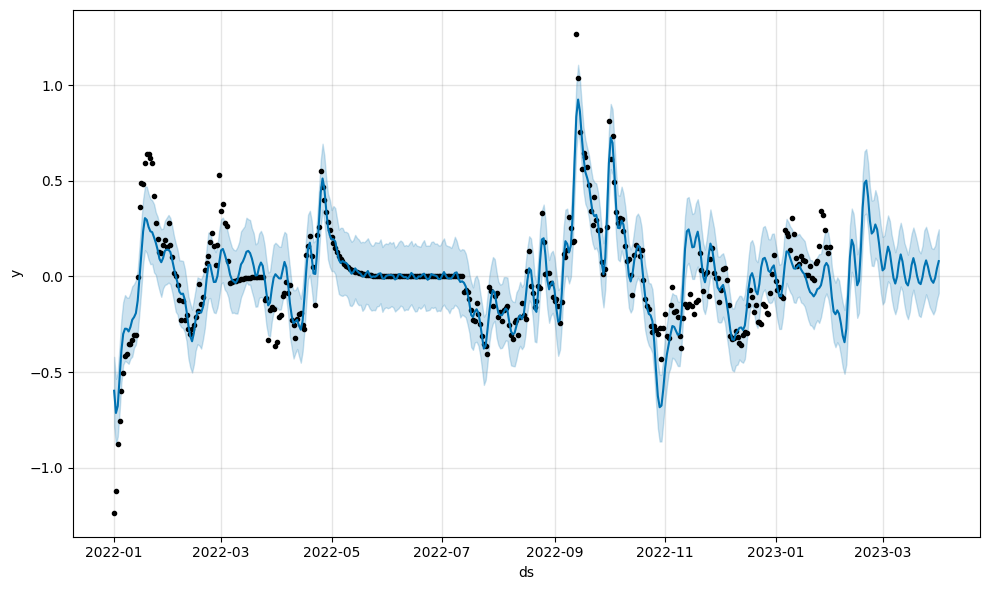

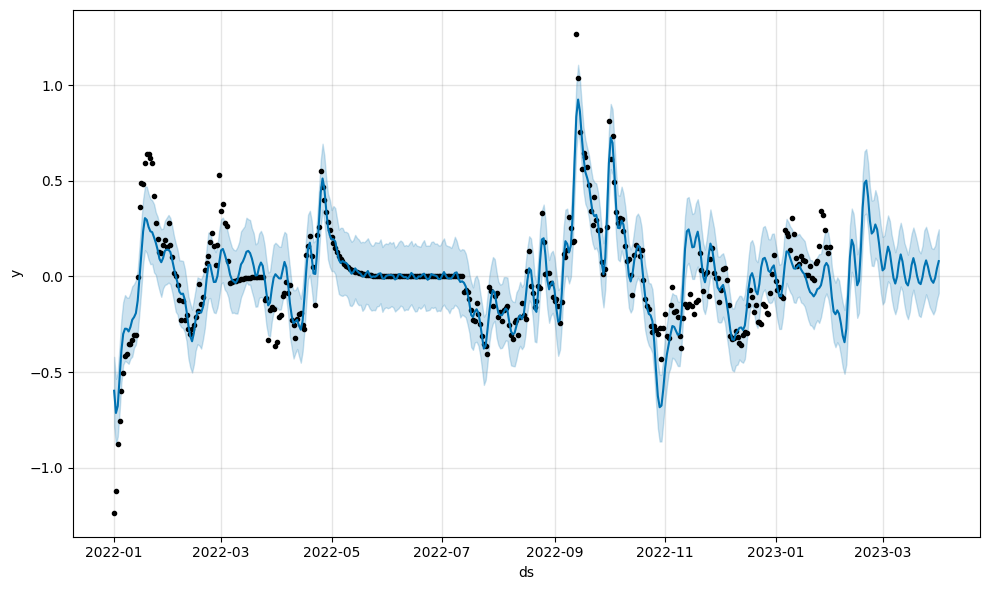

In [36]:
# Предскажем данные еще на месяц
future = model.make_future_dataframe(periods=60, freq='D')
forecast = model.predict(future)
model.plot(forecast)



In [37]:
# Найдем MAE и MAPE
y_true = series
y_pred = forecast['yhat'][:len(series)]
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAE: {mae}')
print(f'MAPE: {mape}')


MAE: 0.08521350572171475
MAPE: 15924.04160012303
